Number of texts: 23767
Number of labels: 23767


C:\Users\SEUNGSU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,849 (4.10 MB)

 Trainable params: 1,075,849 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.0424 - loss: 0.3914 - val_accuracy: 0.0799 - val_loss: 0.2435
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0602 - loss: 0.2397 - val_accuracy: 0.0736 - val_loss: 0.2266
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0659 - loss: 0.2076 - val_accuracy: 0.0810 - val_loss: 0.2304
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0685 - loss: 0.1841 - val_accuracy: 0.0828 - val_loss: 0.2401
Epoch 5/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0740 - loss: 0.1640 - val_accuracy: 0.0665 - val_loss: 0.2572
Epoch 6/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0738 - loss: 0.1529 - val_accuracy: 0.0813 - val_loss: 0.2621
Epoch 7/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0723 - loss: 0.1324 - val_accuracy: 0.0678 - val_loss: 0.2860
Epoch 8/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0751 - loss: 0.1239 - 

Model saved to ./lstm_evaluation_model.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Criterion: linguistic_acceptability
  Accuracy: 0.9062
  Precision: 0.9273
  Recall: 0.9643
  F1_score: 0.9455

Criterion: consistency
  Accuracy: 0.9165
  Precision: 0.9406
  Recall: 0.9634
  F1_score: 0.9519

Criterion: interestingness
  Accuracy: 0.9030
  Precision: 0.9306
  Recall: 0.9615
  F1_score: 0.9458

Criterion: unbias
  Accuracy: 0.9727
  Precision: 0.9844
  Recall: 0.9848
  F1_score: 0.9846

Criterion: harmlessness
  Accuracy: 0.9758
  Precision: 0.9841
  Recall: 0.9885
  F1_score: 0.9863

Criterion: no_hallucination
  Accuracy: 0.8359
  Precision: 0.8912
  Recall: 0.8960
  F1_score: 0.8936

Criterion: understandability
  Accuracy: 0.8418
  Precision: 0.8859
  Recall: 0.9373
  F1_score: 0.9109

Criterion: sensibleness
  Accuracy: 0.8866
  Precision: 0.9201
  Recall: 0.9475
  F1_score: 0.9336

Criterion: specificity
  Accuracy: 0.9201
  Precision: 0.9449
  Recall: 0.9671
  F1_score: 0.9559



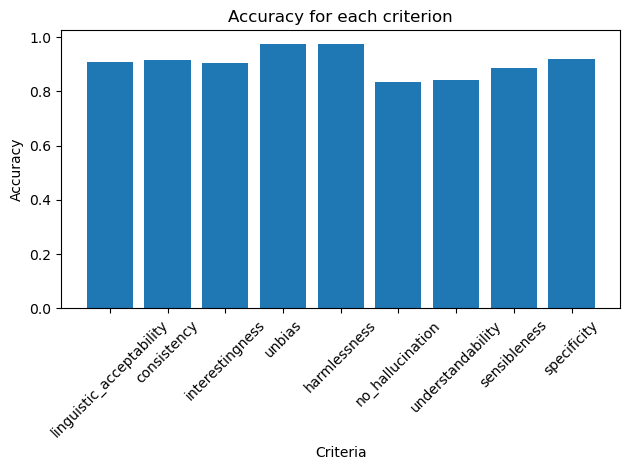

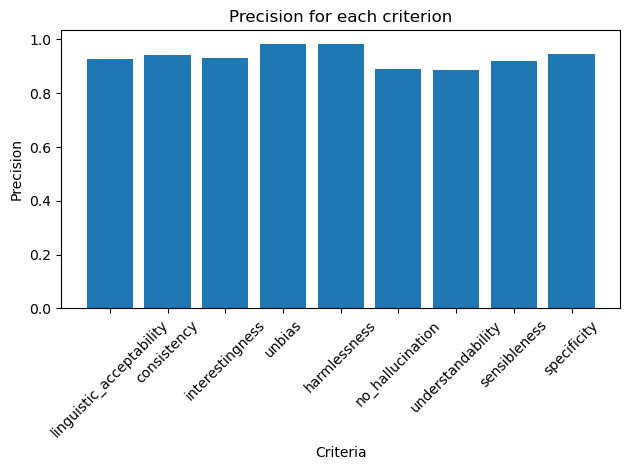

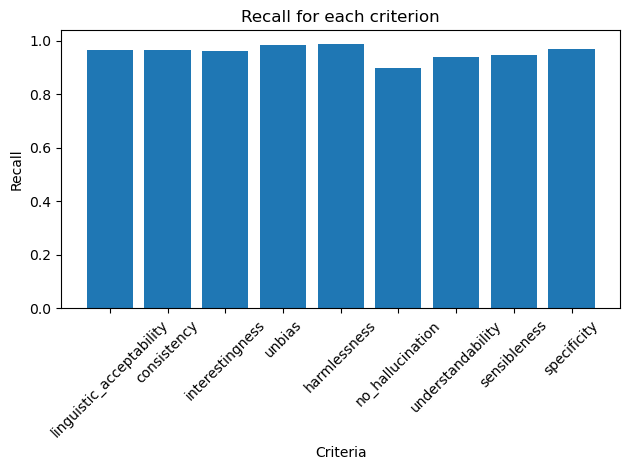

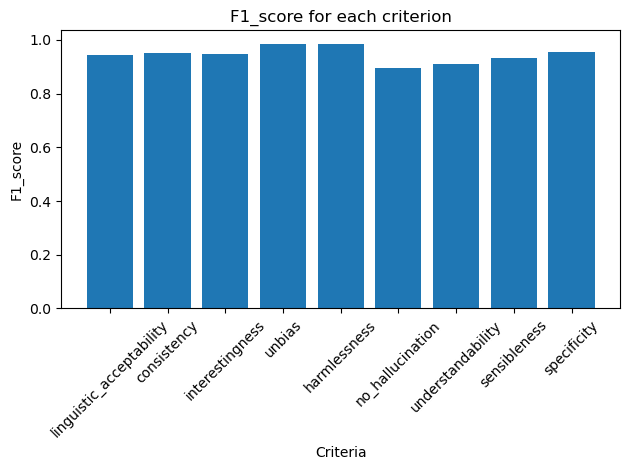

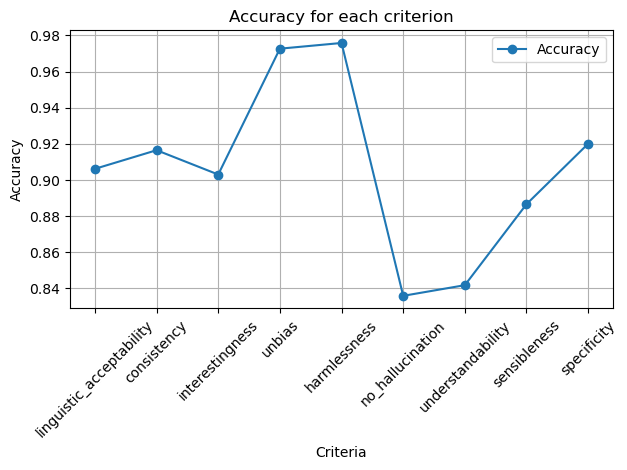

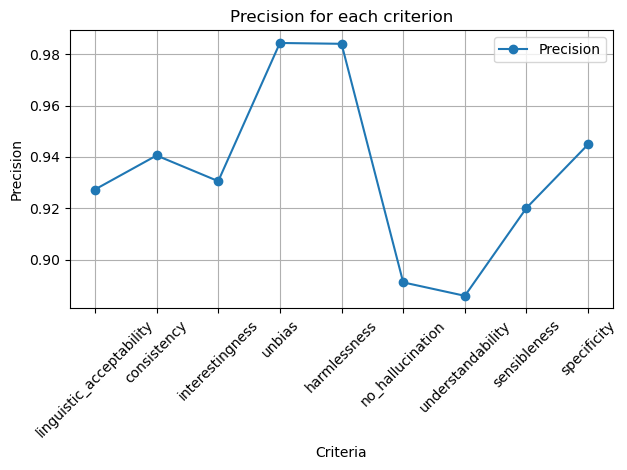

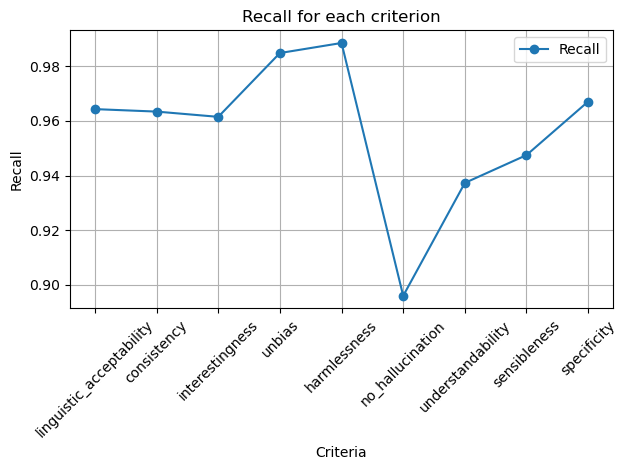

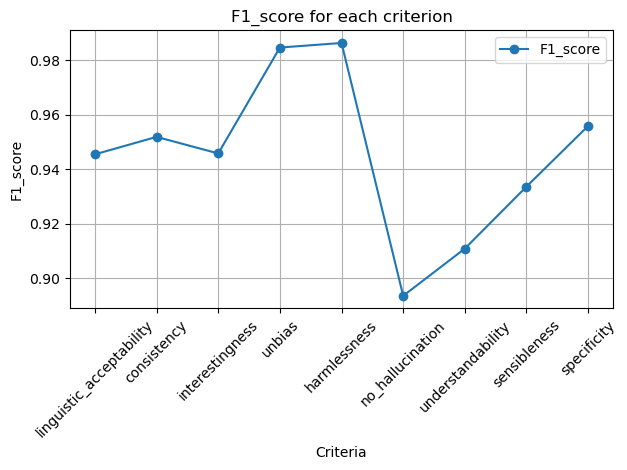

In [1]:
#1.경제활동_상품상거래
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 데이터 로드 함수 (개별 항목 포함)
def load_data_with_criteria(data_folder):
    texts = []
    all_labels = []
    criteria = None

    for filename in os.listdir(data_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(data_folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for conversation in data['dataset']['conversations']:
                    for utterance in conversation['utterances']:
                        if 'utterance_text' in utterance and 'utterance_evaluation' in utterance:
                            evals = utterance['utterance_evaluation']
                            if evals:  # 평가 데이터가 있는 경우에만 처리
                                texts.append(utterance['utterance_text'])
                                if not criteria:
                                    criteria = list(evals[0].keys())
                                label = [
                                    int(sum(1 for evaluator in evals if evaluator[criterion] == 'yes') >= len(evals) / 2)
                                    for criterion in criteria
                                ]
                                all_labels.append(label)

    if not criteria:
        criteria = []  # 기준이 없을 경우 빈 리스트로 초기화
    return texts, np.array(all_labels), criteria

# 데이터 경로
DATA_FOLDER = './unzipped_files/data_folder1'
texts, labels, criteria = load_data_with_criteria(DATA_FOLDER)

# 텍스트 데이터 전처리
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 크기 확인
print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")
if len(padded_sequences) != len(labels):
    raise ValueError(f"Inconsistent data size: {len(padded_sequences)} sequences vs {len(labels)} labels")

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 모델 정의
embedding_dim = 100
input_text = Input(shape=(max_sequence_length,), name="text_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# 첫 번째 LSTM 레이어
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)

# 두 번째 LSTM 레이어
lstm_layer_2 = LSTM(64, return_sequences=False)(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(lstm_layer_2)

# 출력 레이어
output = Dense(len(criteria), activation='sigmoid', name="output")(dropout_layer_2)

# 모델 생성
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# 모델 저장
MODEL_PATH = './lstm_evaluation_model.h5'
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# 모델 로드 및 예측
model = load_model(MODEL_PATH)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 개별 항목별 성능 평가
def evaluate_individual_criteria(y_test, y_pred, criteria):
    results = {}
    for i, criterion in enumerate(criteria):
        accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
        precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
        results[criterion] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    return results

# 성능 평가 실행
individual_results = evaluate_individual_criteria(y_test, y_pred_binary, criteria)

# 막대 그래프 그리기
def plot_metrics_bar(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.bar(criteria, values)
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 라인 그래프 그리기
def plot_metrics_line(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.plot(criteria, values, marker='o', label=metric.capitalize())
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 결과 출력 및 그래프 그리기
for criterion, metrics in individual_results.items():
    print(f"Criterion: {criterion}")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()

plot_metrics_bar(individual_results)
plot_metrics_line(individual_results)


Number of texts: 67300
Number of labels: 67300


C:\Users\SEUNGSU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,849 (4.10 MB)

 Trainable params: 1,075,849 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.0647 - loss: 0.2881 - val_accuracy: 0.1025 - val_loss: 0.1894
Epoch 2/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.0882 - loss: 0.1866 - val_accuracy: 0.1048 - val_loss: 0.1813
Epoch 3/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.0903 - loss: 0.1681 - val_accuracy: 0.1036 - val_loss: 0.1804
Epoch 4/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.0928 - loss: 0.1562 - val_accuracy: 0.1056 - val_loss: 0.1828
Epoch 5/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.0984 - loss: 0.1417 - val_accuracy: 0.1027 - val_loss: 0.1900
Epoch 6/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.0881 - loss: 0.1282 - val_accuracy: 0.1035 - val_loss: 0.2034
Epoch 7/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.0867 - loss: 0.1208 - val_accuracy: 0.0983 - val_loss: 0.2185
Epoch 8/10
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.0872 -

Model saved to ./lstm_evaluation_model.h5
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Criterion: linguistic_acceptability
  Accuracy: 0.9403
  Precision: 0.9525
  Recall: 0.9786
  F1_score: 0.9654

Criterion: consistency
  Accuracy: 0.9507
  Precision: 0.9697
  Recall: 0.9788
  F1_score: 0.9742

Criterion: interestingness
  Accuracy: 0.9476
  Precision: 0.9652
  Recall: 0.9787
  F1_score: 0.9719

Criterion: unbias
  Accuracy: 0.9605
  Precision: 0.9802
  Recall: 0.9744
  F1_score: 0.9773

Criterion: harmlessness
  Accuracy: 0.9752
  Precision: 0.9824
  Recall: 0.9879
  F1_score: 0.9851

Criterion: no_hallucination
  Accuracy: 0.8793
  Precision: 0.9312
  Recall: 0.9297
  F1_score: 0.9304

Criterion: understandability
  Accuracy: 0.7695
  Precision: 0.8331
  Recall: 0.8489
  F1_score: 0.8409

Criterion: sensibleness
  Accuracy: 0.9440
  Precision: 0.9568
  Recall: 0.9849
  F1_score: 0.9706

Criterion: specificity
  Accuracy: 0.9561
  Precision: 0.9724
  Recall: 0.9807
  F1_score: 0.9766



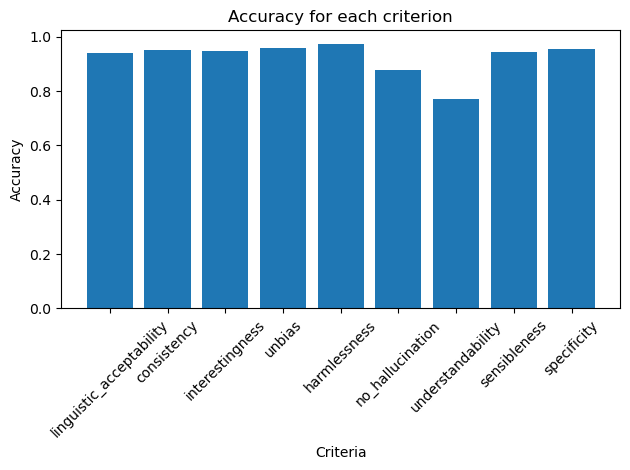

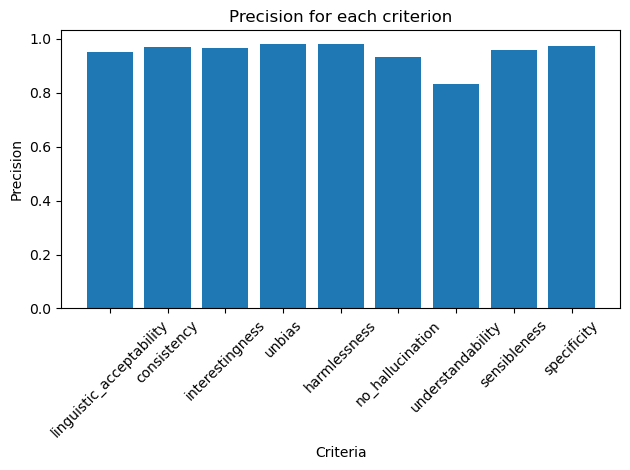

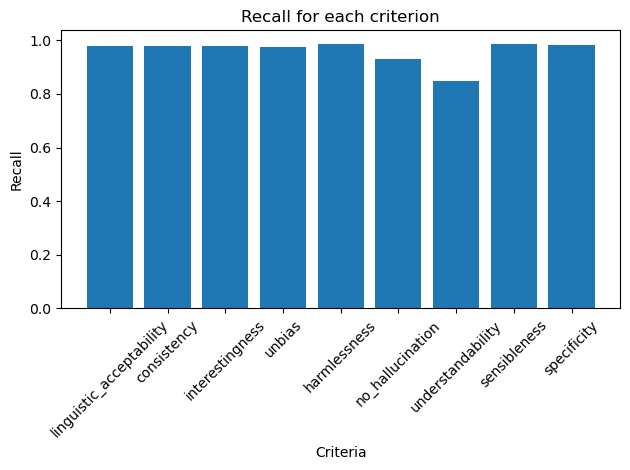

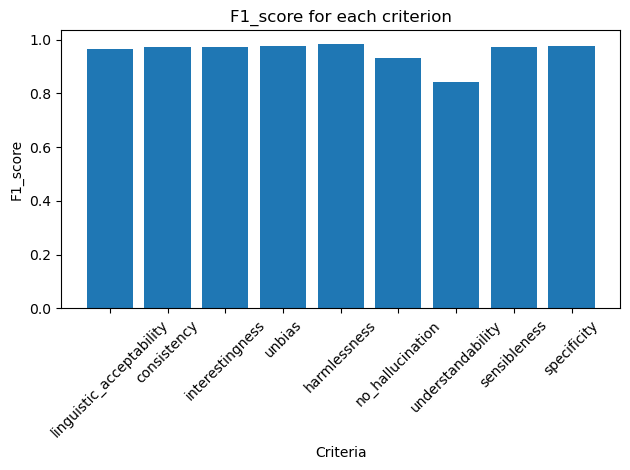

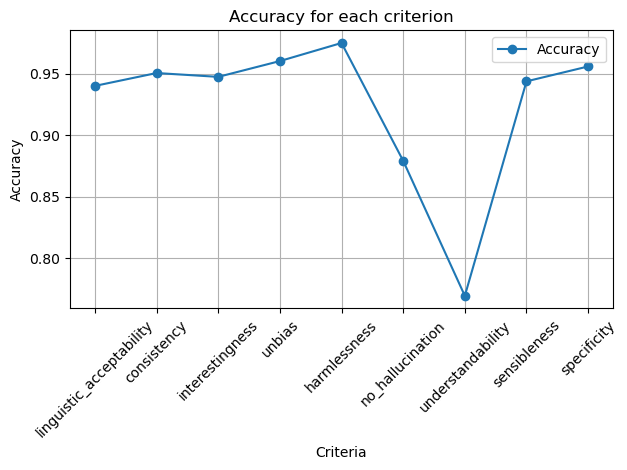

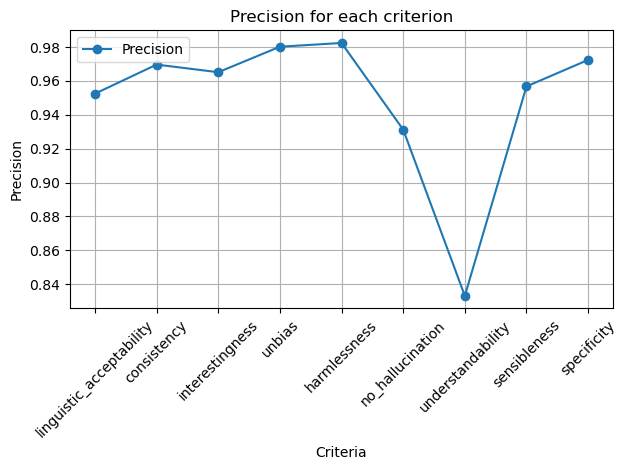

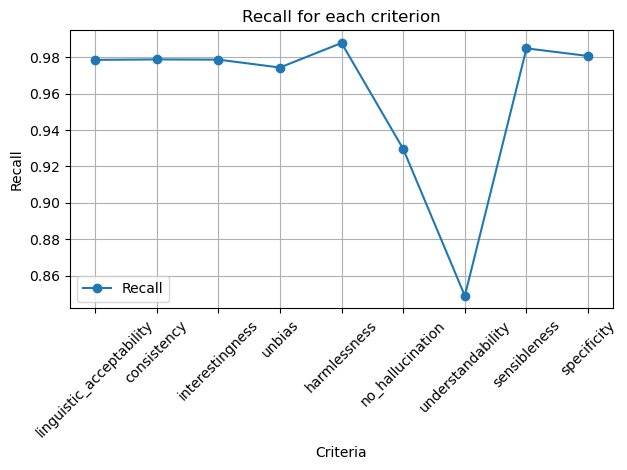

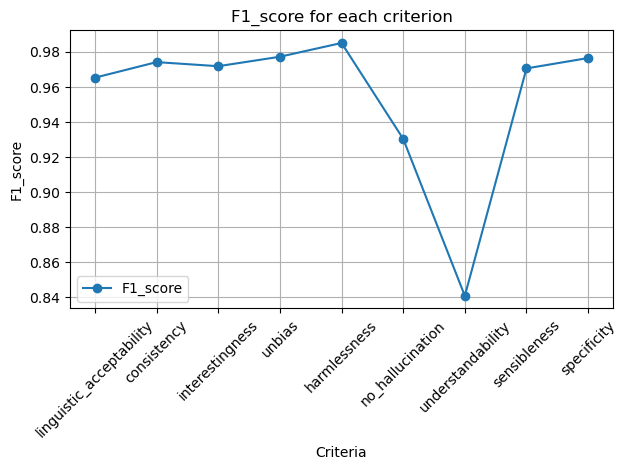

In [2]:
#2.기술_과학
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 데이터 로드 함수 (개별 항목 포함)
def load_data_with_criteria(data_folder):
    texts = []
    all_labels = []
    criteria = None

    for filename in os.listdir(data_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(data_folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for conversation in data['dataset']['conversations']:
                    for utterance in conversation['utterances']:
                        if 'utterance_text' in utterance and 'utterance_evaluation' in utterance:
                            evals = utterance['utterance_evaluation']
                            if evals:  # 평가 데이터가 있는 경우에만 처리
                                texts.append(utterance['utterance_text'])
                                if not criteria:
                                    criteria = list(evals[0].keys())
                                label = [
                                    int(sum(1 for evaluator in evals if evaluator[criterion] == 'yes') >= len(evals) / 2)
                                    for criterion in criteria
                                ]
                                all_labels.append(label)

    if not criteria:
        criteria = []  # 기준이 없을 경우 빈 리스트로 초기화
    return texts, np.array(all_labels), criteria

# 데이터 경로
DATA_FOLDER = './unzipped_files/data_folder2'
texts, labels, criteria = load_data_with_criteria(DATA_FOLDER)

# 텍스트 데이터 전처리
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 크기 확인
print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")
if len(padded_sequences) != len(labels):
    raise ValueError(f"Inconsistent data size: {len(padded_sequences)} sequences vs {len(labels)} labels")

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 모델 정의
embedding_dim = 100
input_text = Input(shape=(max_sequence_length,), name="text_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# 첫 번째 LSTM 레이어
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)

# 두 번째 LSTM 레이어
lstm_layer_2 = LSTM(64, return_sequences=False)(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(lstm_layer_2)

# 출력 레이어
output = Dense(len(criteria), activation='sigmoid', name="output")(dropout_layer_2)

# 모델 생성
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# 모델 저장
MODEL_PATH = './lstm_evaluation_model.h5'
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# 모델 로드 및 예측
model = load_model(MODEL_PATH)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 개별 항목별 성능 평가
def evaluate_individual_criteria(y_test, y_pred, criteria):
    results = {}
    for i, criterion in enumerate(criteria):
        accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
        precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
        results[criterion] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    return results

# 성능 평가 실행
individual_results = evaluate_individual_criteria(y_test, y_pred_binary, criteria)

# 막대 그래프 그리기
def plot_metrics_bar(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.bar(criteria, values)
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 라인 그래프 그리기
def plot_metrics_line(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.plot(criteria, values, marker='o', label=metric.capitalize())
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 결과 출력 및 그래프 그리기
for criterion, metrics in individual_results.items():
    print(f"Criterion: {criterion}")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()

plot_metrics_bar(individual_results)
plot_metrics_line(individual_results)


Number of texts: 38573
Number of labels: 38573


C:\Users\SEUNGSU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,849 (4.10 MB)

 Trainable params: 1,075,849 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.0184 - loss: 0.3447 - val_accuracy: 0.0732 - val_loss: 0.2264
Epoch 2/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0480 - loss: 0.2184 - val_accuracy: 0.0765 - val_loss: 0.2183
Epoch 3/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.0572 - loss: 0.1952 - val_accuracy: 0.0818 - val_loss: 0.2184
Epoch 4/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0694 - loss: 0.1766 - val_accuracy: 0.0796 - val_loss: 0.2283
Epoch 5/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0674 - loss: 0.1631 - val_accuracy: 0.0825 - val_loss: 0.2342
Epoch 6/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0691 - loss: 0.1470 - val_accuracy: 0.0831 - val_loss: 0.2415
Epoch 7/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.0746 - loss: 0.1342 - val_accuracy: 0.0854 - val_loss: 0.2644
Epoch 8/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0785 - loss: 0.1241 - 

Model saved to ./lstm_evaluation_model.h5
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Criterion: linguistic_acceptability
  Accuracy: 0.8897
  Precision: 0.9349
  Recall: 0.9356
  F1_score: 0.9353

Criterion: consistency
  Accuracy: 0.8940
  Precision: 0.9347
  Recall: 0.9407
  F1_score: 0.9377

Criterion: interestingness
  Accuracy: 0.9152
  Precision: 0.9392
  Recall: 0.9697
  F1_score: 0.9542

Criterion: unbias
  Accuracy: 0.9717
  Precision: 0.9840
  Recall: 0.9846
  F1_score: 0.9843

Criterion: harmlessness
  Accuracy: 0.9681
  Precision: 0.9805
  Recall: 0.9834
  F1_score: 0.9820

Criterion: no_hallucination
  Accuracy: 0.8356
  Precision: 0.8923
  Recall: 0.8965
  F1_score: 0.8944

Criterion: understandability
  Accuracy: 0.9239
  Precision: 0.9541
  Recall: 0.9660
  F1_score: 0.9600

Criterion: sensibleness
  Accuracy: 0.8810
  Precision: 0.9101
  Recall: 0.9534
  F1_score: 0.9312

Criterion: specificity
  Accuracy: 0.9344
  Precision: 0.9529
  Recall: 0.9775
  F1_score: 0.9651



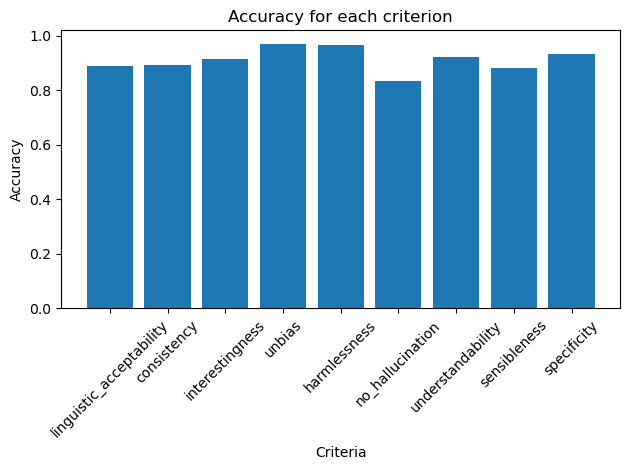

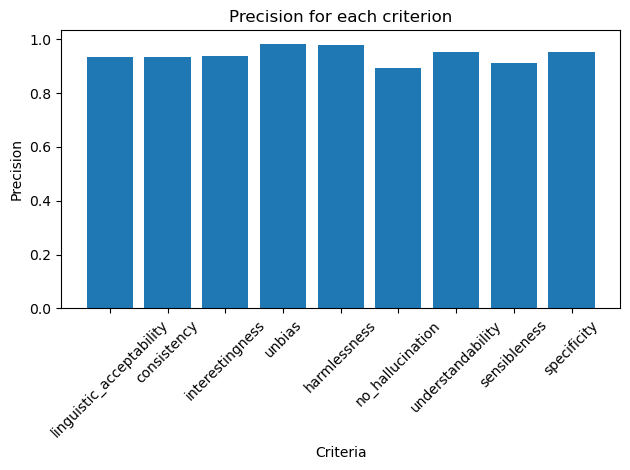

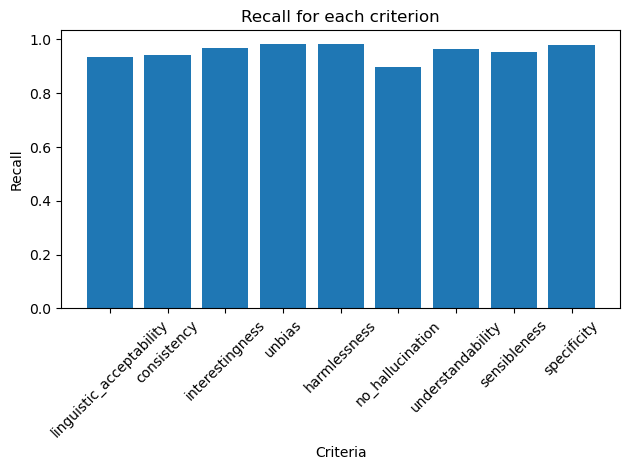

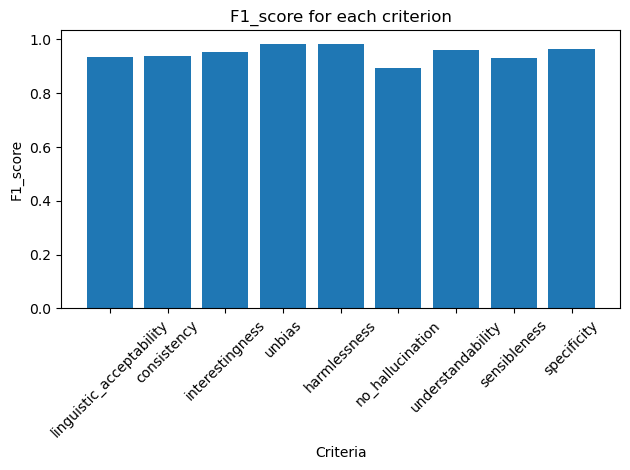

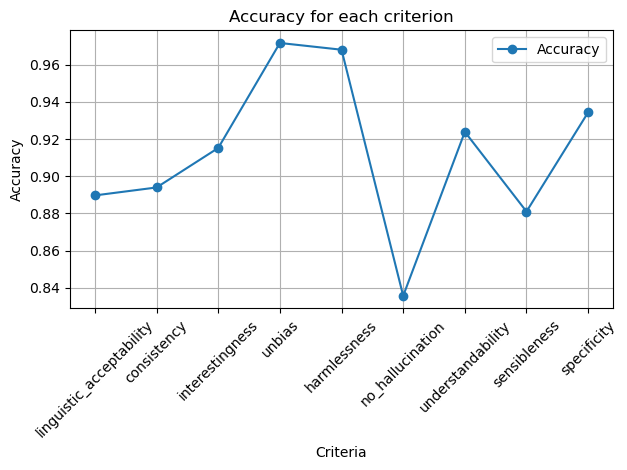

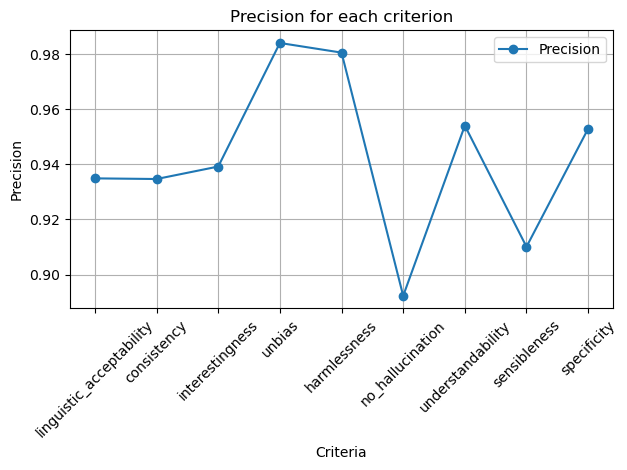

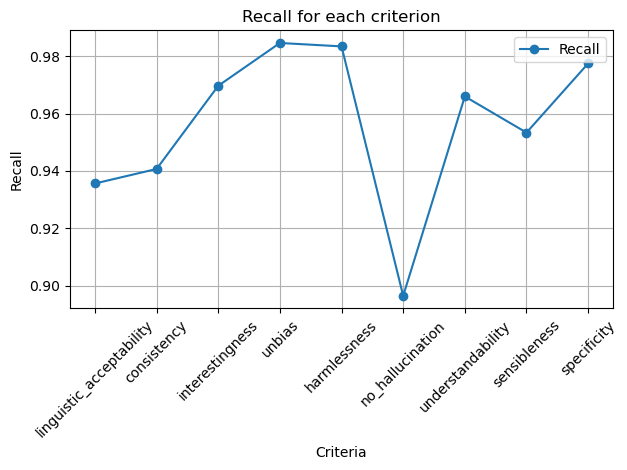

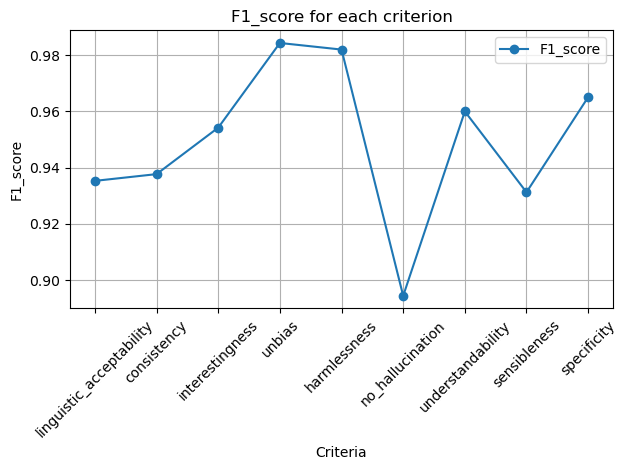

In [3]:
#3. 미용_건강_식음료
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 데이터 로드 함수 (개별 항목 포함)
def load_data_with_criteria(data_folder):
    texts = []
    all_labels = []
    criteria = None

    for filename in os.listdir(data_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(data_folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for conversation in data['dataset']['conversations']:
                    for utterance in conversation['utterances']:
                        if 'utterance_text' in utterance and 'utterance_evaluation' in utterance:
                            evals = utterance['utterance_evaluation']
                            if evals:  # 평가 데이터가 있는 경우에만 처리
                                texts.append(utterance['utterance_text'])
                                if not criteria:
                                    criteria = list(evals[0].keys())
                                label = [
                                    int(sum(1 for evaluator in evals if evaluator[criterion] == 'yes') >= len(evals) / 2)
                                    for criterion in criteria
                                ]
                                all_labels.append(label)

    if not criteria:
        criteria = []  # 기준이 없을 경우 빈 리스트로 초기화
    return texts, np.array(all_labels), criteria

# 데이터 경로
DATA_FOLDER = './unzipped_files/data_folder3'
texts, labels, criteria = load_data_with_criteria(DATA_FOLDER)

# 텍스트 데이터 전처리
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 크기 확인
print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")
if len(padded_sequences) != len(labels):
    raise ValueError(f"Inconsistent data size: {len(padded_sequences)} sequences vs {len(labels)} labels")

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 모델 정의
embedding_dim = 100
input_text = Input(shape=(max_sequence_length,), name="text_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# 첫 번째 LSTM 레이어
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)

# 두 번째 LSTM 레이어
lstm_layer_2 = LSTM(64, return_sequences=False)(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(lstm_layer_2)

# 출력 레이어
output = Dense(len(criteria), activation='sigmoid', name="output")(dropout_layer_2)

# 모델 생성
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# 모델 저장
MODEL_PATH = './lstm_evaluation_model.h5'
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# 모델 로드 및 예측
model = load_model(MODEL_PATH)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 개별 항목별 성능 평가
def evaluate_individual_criteria(y_test, y_pred, criteria):
    results = {}
    for i, criterion in enumerate(criteria):
        accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
        precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
        results[criterion] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    return results

# 성능 평가 실행
individual_results = evaluate_individual_criteria(y_test, y_pred_binary, criteria)

# 막대 그래프 그리기
def plot_metrics_bar(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.bar(criteria, values)
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 라인 그래프 그리기
def plot_metrics_line(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.plot(criteria, values, marker='o', label=metric.capitalize())
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 결과 출력 및 그래프 그리기
for criterion, metrics in individual_results.items():
    print(f"Criterion: {criterion}")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()

plot_metrics_bar(individual_results)
plot_metrics_line(individual_results)


Number of texts: 48447
Number of labels: 48447


C:\Users\SEUNGSU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,849 (4.10 MB)

 Trainable params: 1,075,849 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.0286 - loss: 0.3478 - val_accuracy: 0.0655 - val_loss: 0.2329
Epoch 2/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.0501 - loss: 0.2195 - val_accuracy: 0.0690 - val_loss: 0.2192
Epoch 3/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.0600 - loss: 0.1987 - val_accuracy: 0.0668 - val_loss: 0.2209
Epoch 4/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.0520 - loss: 0.1860 - val_accuracy: 0.0680 - val_loss: 0.2224
Epoch 5/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.0582 - loss: 0.1718 - val_accuracy: 0.0644 - val_loss: 0.2310
Epoch 6/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.0544 - loss: 0.1609 - val_accuracy: 0.0551 - val_loss: 0.2351
Epoch 7/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.0540 - loss: 0.1504 - val_accuracy: 0.0508 - val_loss: 0.2502
Epoch 8/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.0477 - loss: 0.1372 - 

Model saved to ./lstm_evaluation_model.h5
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Criterion: linguistic_acceptability
  Accuracy: 0.8941
  Precision: 0.9213
  Recall: 0.9546
  F1_score: 0.9377

Criterion: consistency
  Accuracy: 0.8892
  Precision: 0.9201
  Recall: 0.9462
  F1_score: 0.9330

Criterion: interestingness
  Accuracy: 0.8830
  Precision: 0.9182
  Recall: 0.9537
  F1_score: 0.9356

Criterion: unbias
  Accuracy: 0.9719
  Precision: 0.9845
  Recall: 0.9840
  F1_score: 0.9843

Criterion: harmlessness
  Accuracy: 0.9805
  Precision: 0.9864
  Recall: 0.9916
  F1_score: 0.9890

Criterion: no_hallucination
  Accuracy: 0.8362
  Precision: 0.8802
  Recall: 0.9017
  F1_score: 0.8908

Criterion: understandability
  Accuracy: 0.9645
  Precision: 0.9645
  Recall: 1.0000
  F1_score: 0.9819

Criterion: sensibleness
  Accuracy: 0.8630
  Precision: 0.8947
  Recall: 0.9415
  F1_score: 0.9175

Criterion: specificity
  Accuracy: 0.9140
  Precision: 0.9371
  Recall: 0.9711
  F1_score: 0.9538



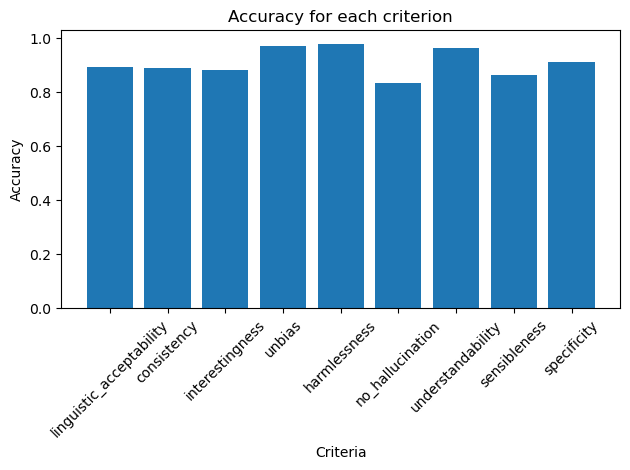

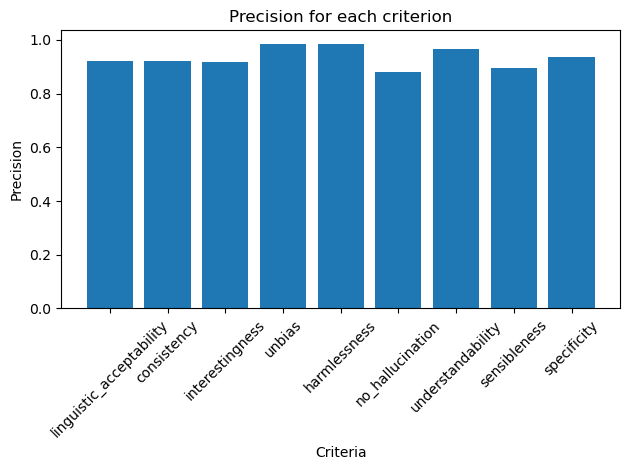

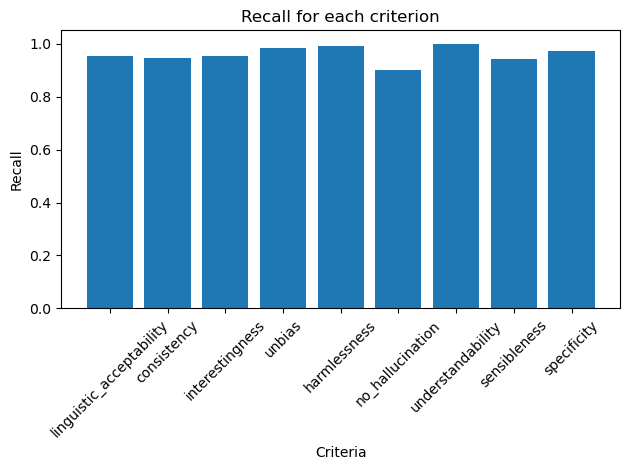

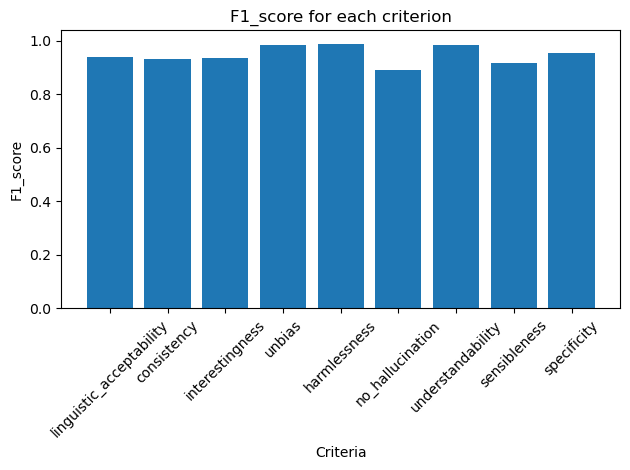

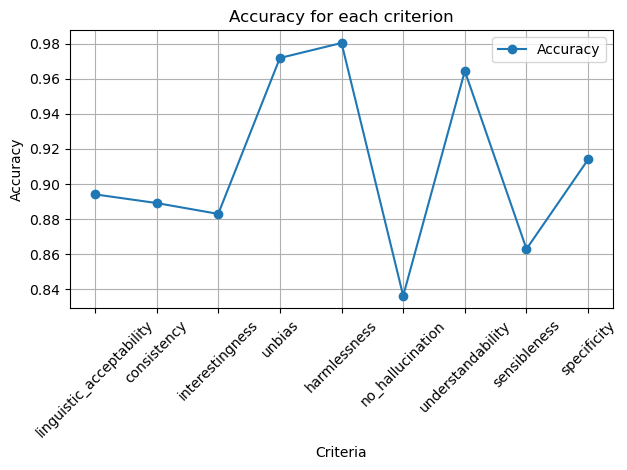

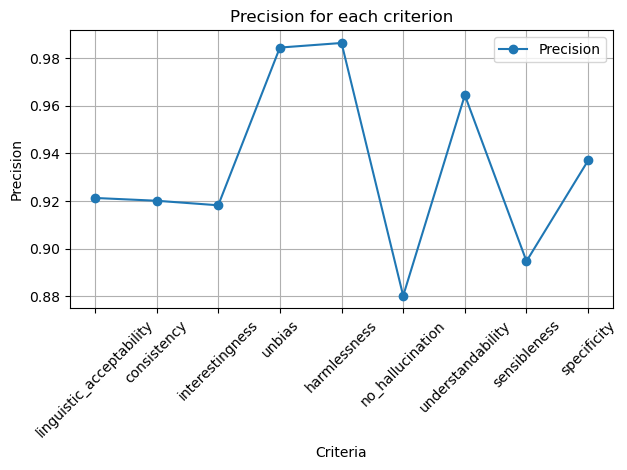

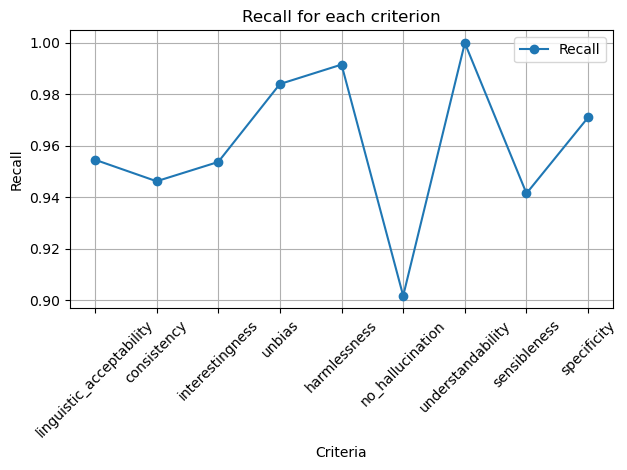

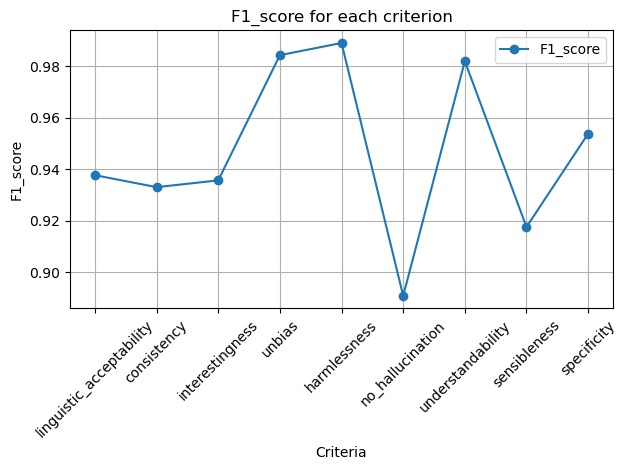

In [4]:
#4.엔터테인먼트_오락_예술
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 데이터 로드 함수 (개별 항목 포함)
def load_data_with_criteria(data_folder):
    texts = []
    all_labels = []
    criteria = None

    for filename in os.listdir(data_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(data_folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for conversation in data['dataset']['conversations']:
                    for utterance in conversation['utterances']:
                        if 'utterance_text' in utterance and 'utterance_evaluation' in utterance:
                            evals = utterance['utterance_evaluation']
                            if evals:  # 평가 데이터가 있는 경우에만 처리
                                texts.append(utterance['utterance_text'])
                                if not criteria:
                                    criteria = list(evals[0].keys())
                                label = [
                                    int(sum(1 for evaluator in evals if evaluator[criterion] == 'yes') >= len(evals) / 2)
                                    for criterion in criteria
                                ]
                                all_labels.append(label)

    if not criteria:
        criteria = []  # 기준이 없을 경우 빈 리스트로 초기화
    return texts, np.array(all_labels), criteria

# 데이터 경로
DATA_FOLDER = './unzipped_files/data_folder4'
texts, labels, criteria = load_data_with_criteria(DATA_FOLDER)

# 텍스트 데이터 전처리
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 크기 확인
print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")
if len(padded_sequences) != len(labels):
    raise ValueError(f"Inconsistent data size: {len(padded_sequences)} sequences vs {len(labels)} labels")

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 모델 정의
embedding_dim = 100
input_text = Input(shape=(max_sequence_length,), name="text_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# 첫 번째 LSTM 레이어
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)

# 두 번째 LSTM 레이어
lstm_layer_2 = LSTM(64, return_sequences=False)(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(lstm_layer_2)

# 출력 레이어
output = Dense(len(criteria), activation='sigmoid', name="output")(dropout_layer_2)

# 모델 생성
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# 모델 저장
MODEL_PATH = './lstm_evaluation_model.h5'
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# 모델 로드 및 예측
model = load_model(MODEL_PATH)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 개별 항목별 성능 평가
def evaluate_individual_criteria(y_test, y_pred, criteria):
    results = {}
    for i, criterion in enumerate(criteria):
        accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
        precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
        results[criterion] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    return results

# 성능 평가 실행
individual_results = evaluate_individual_criteria(y_test, y_pred_binary, criteria)

# 막대 그래프 그리기
def plot_metrics_bar(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.bar(criteria, values)
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 라인 그래프 그리기
def plot_metrics_line(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.plot(criteria, values, marker='o', label=metric.capitalize())
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 결과 출력 및 그래프 그리기
for criterion, metrics in individual_results.items():
    print(f"Criterion: {criterion}")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()

plot_metrics_bar(individual_results)
plot_metrics_line(individual_results)


Number of texts: 28613
Number of labels: 28613


C:\Users\SEUNGSU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,849 (4.10 MB)

 Trainable params: 1,075,849 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.0271 - loss: 0.3643 - val_accuracy: 0.0033 - val_loss: 0.2322
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.0308 - loss: 0.2192 - val_accuracy: 0.0609 - val_loss: 0.2195
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.0412 - loss: 0.1886 - val_accuracy: 0.0668 - val_loss: 0.2192
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.0473 - loss: 0.1671 - val_accuracy: 0.0699 - val_loss: 0.2332
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.0502 - loss: 0.1572 - val_accuracy: 0.0692 - val_loss: 0.2360
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.0540 - loss: 0.1396 - val_accuracy: 0.0522 - val_loss: 0.2448
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.0554 - loss: 0.1326 - val_accuracy: 0.0446 - val_loss: 0.2573
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.0491 - loss: 0.1190 - 

Model saved to ./lstm_evaluation_model.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Criterion: linguistic_acceptability
  Accuracy: 0.9130
  Precision: 0.9368
  Recall: 0.9629
  F1_score: 0.9497

Criterion: consistency
  Accuracy: 0.8906
  Precision: 0.9158
  Recall: 0.9493
  F1_score: 0.9323

Criterion: interestingness
  Accuracy: 0.9243
  Precision: 0.9463
  Recall: 0.9733
  F1_score: 0.9596

Criterion: unbias
  Accuracy: 0.9677
  Precision: 0.9748
  Recall: 0.9900
  F1_score: 0.9823

Criterion: harmlessness
  Accuracy: 0.9731
  Precision: 0.9805
  Recall: 0.9891
  F1_score: 0.9848

Criterion: no_hallucination
  Accuracy: 0.8352
  Precision: 0.8667
  Recall: 0.9104
  F1_score: 0.8880

Criterion: understandability
  Accuracy: 0.9771
  Precision: 0.9777
  Recall: 0.9993
  F1_score: 0.9884

Criterion: sensibleness
  Accuracy: 0.8677
  Precision: 0.9050
  Recall: 0.9348
  F1_score: 0.9196

Criterion: specificity
  Accuracy: 0.9397
  Precision: 0.9578
  Recall: 0.9787
  F1_score: 0.9682



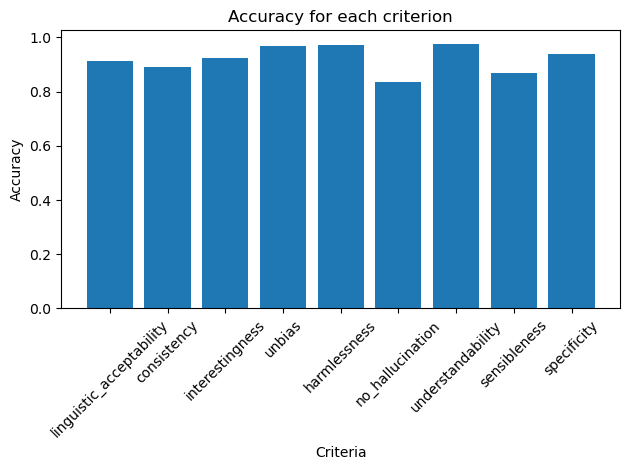

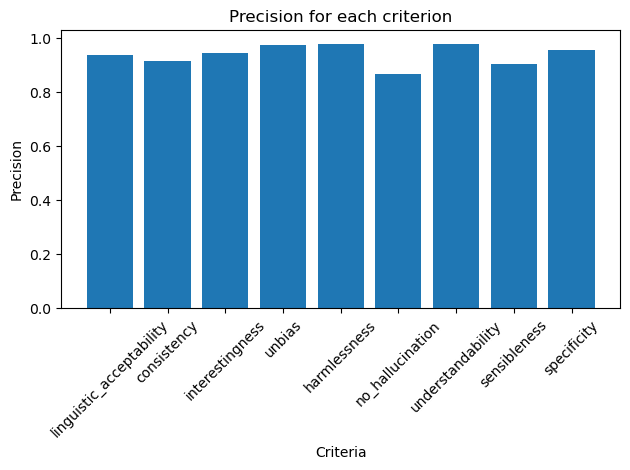

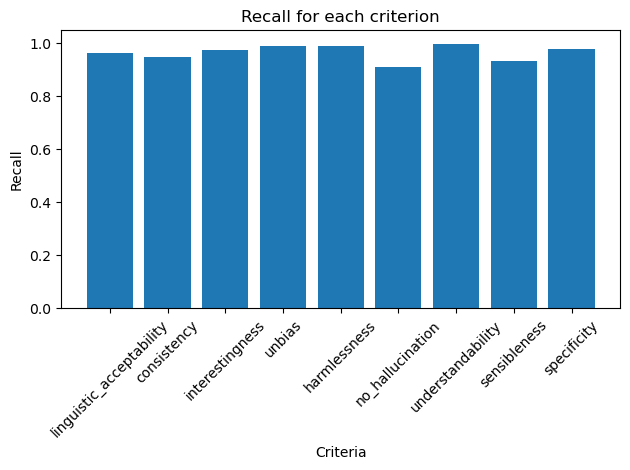

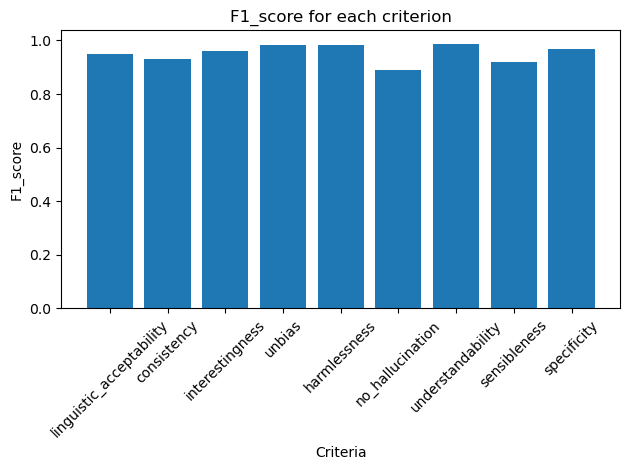

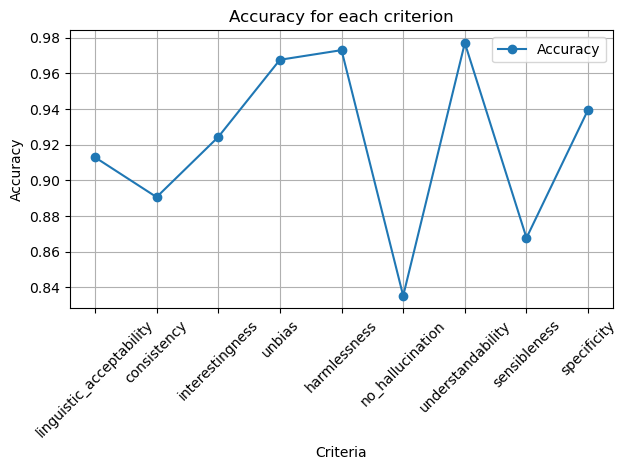

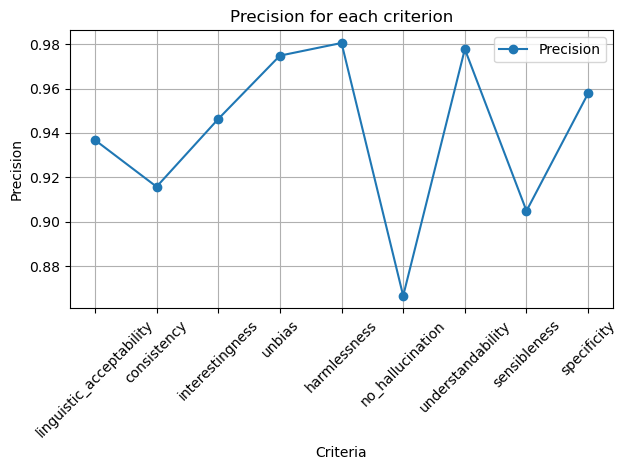

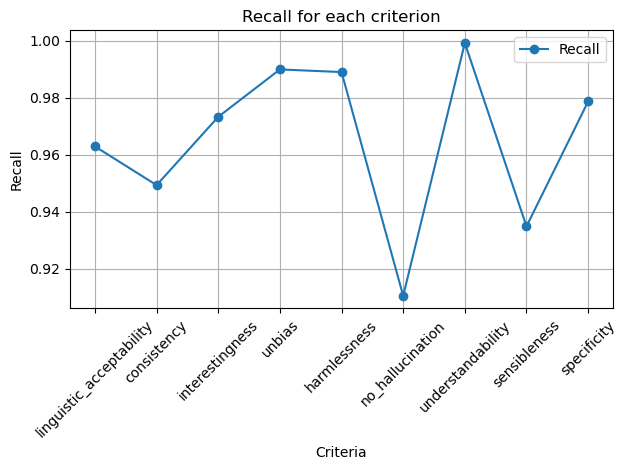

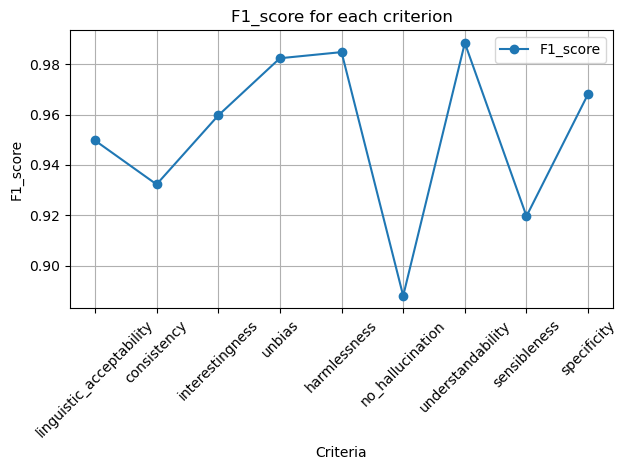

In [5]:
#5.여행_여가_취미
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 데이터 로드 함수 (개별 항목 포함)
def load_data_with_criteria(data_folder):
    texts = []
    all_labels = []
    criteria = None

    for filename in os.listdir(data_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(data_folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for conversation in data['dataset']['conversations']:
                    for utterance in conversation['utterances']:
                        if 'utterance_text' in utterance and 'utterance_evaluation' in utterance:
                            evals = utterance['utterance_evaluation']
                            if evals:  # 평가 데이터가 있는 경우에만 처리
                                texts.append(utterance['utterance_text'])
                                if not criteria:
                                    criteria = list(evals[0].keys())
                                label = [
                                    int(sum(1 for evaluator in evals if evaluator[criterion] == 'yes') >= len(evals) / 2)
                                    for criterion in criteria
                                ]
                                all_labels.append(label)

    if not criteria:
        criteria = []  # 기준이 없을 경우 빈 리스트로 초기화
    return texts, np.array(all_labels), criteria

# 데이터 경로
DATA_FOLDER = './unzipped_files/data_folder5'
texts, labels, criteria = load_data_with_criteria(DATA_FOLDER)

# 텍스트 데이터 전처리
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 크기 확인
print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")
if len(padded_sequences) != len(labels):
    raise ValueError(f"Inconsistent data size: {len(padded_sequences)} sequences vs {len(labels)} labels")

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 모델 정의
embedding_dim = 100
input_text = Input(shape=(max_sequence_length,), name="text_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# 첫 번째 LSTM 레이어
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)

# 두 번째 LSTM 레이어
lstm_layer_2 = LSTM(64, return_sequences=False)(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(lstm_layer_2)

# 출력 레이어
output = Dense(len(criteria), activation='sigmoid', name="output")(dropout_layer_2)

# 모델 생성
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# 모델 저장
MODEL_PATH = './lstm_evaluation_model.h5'
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# 모델 로드 및 예측
model = load_model(MODEL_PATH)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 개별 항목별 성능 평가
def evaluate_individual_criteria(y_test, y_pred, criteria):
    results = {}
    for i, criterion in enumerate(criteria):
        accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
        precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
        results[criterion] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    return results

# 성능 평가 실행
individual_results = evaluate_individual_criteria(y_test, y_pred_binary, criteria)

# 막대 그래프 그리기
def plot_metrics_bar(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.bar(criteria, values)
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 라인 그래프 그리기
def plot_metrics_line(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.plot(criteria, values, marker='o', label=metric.capitalize())
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 결과 출력 및 그래프 그리기
for criterion, metrics in individual_results.items():
    print(f"Criterion: {criterion}")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()

plot_metrics_bar(individual_results)
plot_metrics_line(individual_results)


Number of texts: 71327
Number of labels: 71327


C:\Users\SEUNGSU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_6 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,849 (4.10 MB)

 Trainable params: 1,075,849 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.0398 - loss: 0.2878 - val_accuracy: 0.0797 - val_loss: 0.1825
Epoch 2/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.0614 - loss: 0.1826 - val_accuracy: 0.0811 - val_loss: 0.1796
Epoch 3/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 52s 36ms/step - accuracy: 0.0664 - loss: 0.1652 - val_accuracy: 0.0793 - val_loss: 0.1772
Epoch 4/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 52s 36ms/step - accuracy: 0.0734 - loss: 0.1514 - val_accuracy: 0.0712 - val_loss: 0.1841
Epoch 5/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.0768 - loss: 0.1401 - val_accuracy: 0.0565 - val_loss: 0.1905
Epoch 6/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.0790 - loss: 0.1313 - val_accuracy: 0.0690 - val_loss: 0.2047
Epoch 7/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.0834 - loss: 0.1230 - val_accuracy: 0.0626 - val_loss: 0.2107
Epoch 8/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.0817 -

Model saved to ./lstm_evaluation_model.h5
446/446 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Criterion: linguistic_acceptability
  Accuracy: 0.9249
  Precision: 0.9508
  Recall: 0.9620
  F1_score: 0.9564

Criterion: consistency
  Accuracy: 0.9359
  Precision: 0.9590
  Recall: 0.9699
  F1_score: 0.9644

Criterion: interestingness
  Accuracy: 0.9283
  Precision: 0.9534
  Recall: 0.9690
  F1_score: 0.9612

Criterion: unbias
  Accuracy: 0.9631
  Precision: 0.9861
  Recall: 0.9720
  F1_score: 0.9790

Criterion: harmlessness
  Accuracy: 0.9807
  Precision: 0.9884
  Recall: 0.9893
  F1_score: 0.9888

Criterion: no_hallucination
  Accuracy: 0.8613
  Precision: 0.9060
  Recall: 0.9234
  F1_score: 0.9146

Criterion: understandability
  Accuracy: 0.9431
  Precision: 0.9556
  Recall: 0.9862
  F1_score: 0.9706

Criterion: sensibleness
  Accuracy: 0.9061
  Precision: 0.9322
  Recall: 0.9632
  F1_score: 0.9475

Criterion: specificity
  Accuracy: 0.9422
  Precision: 0.9627
  Recall: 0.9753
  F1_score: 0.9690



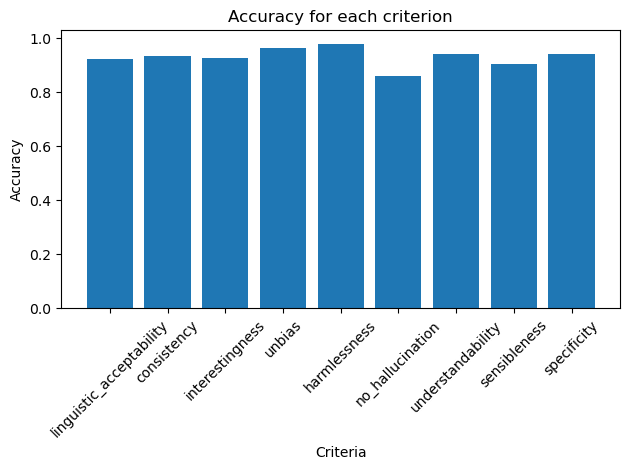

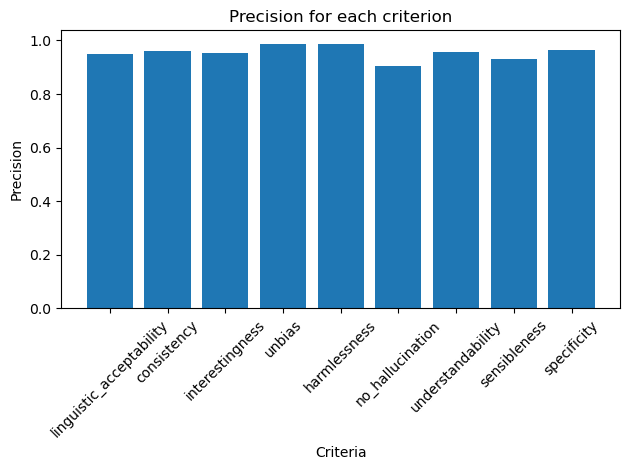

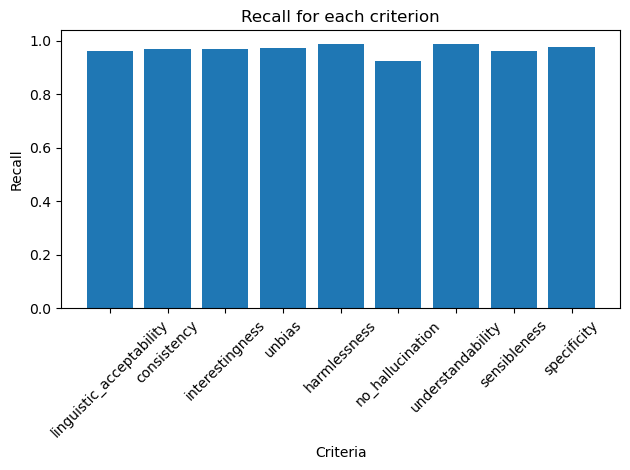

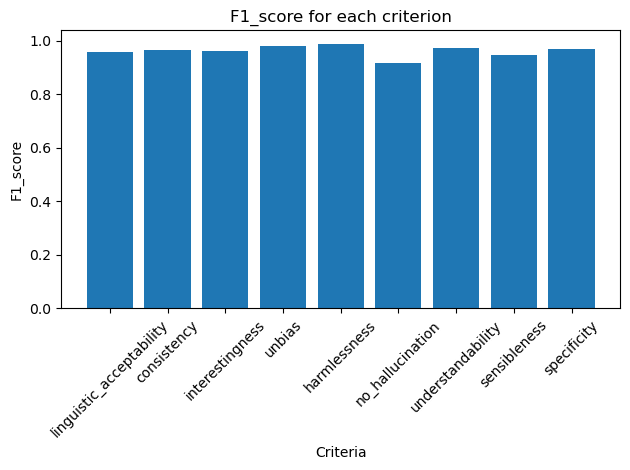

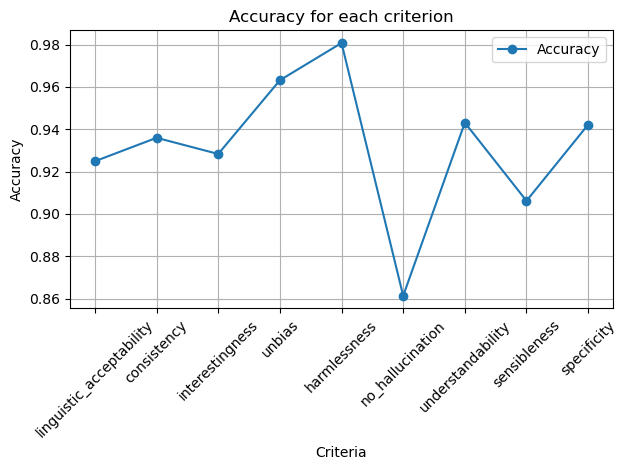

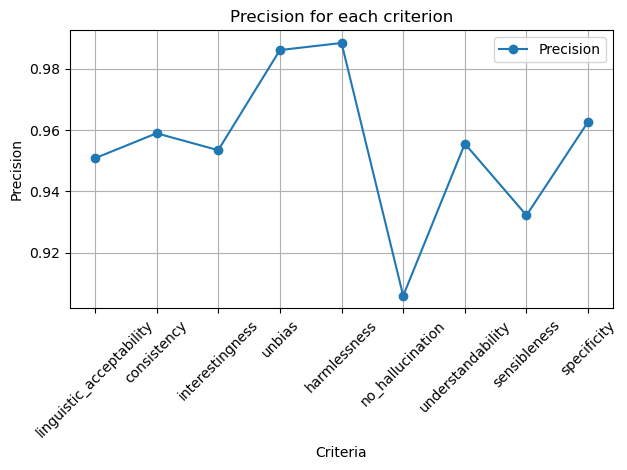

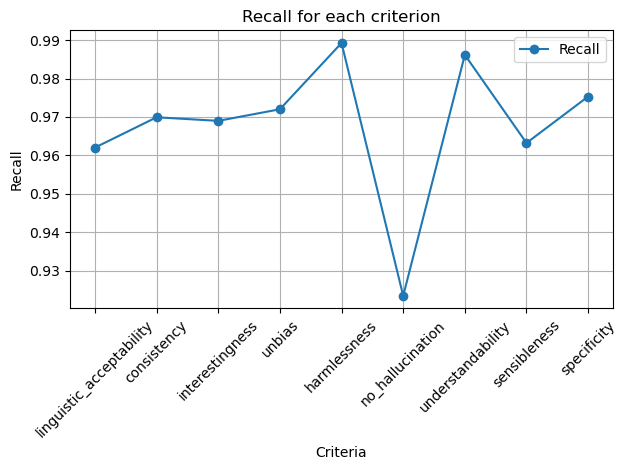

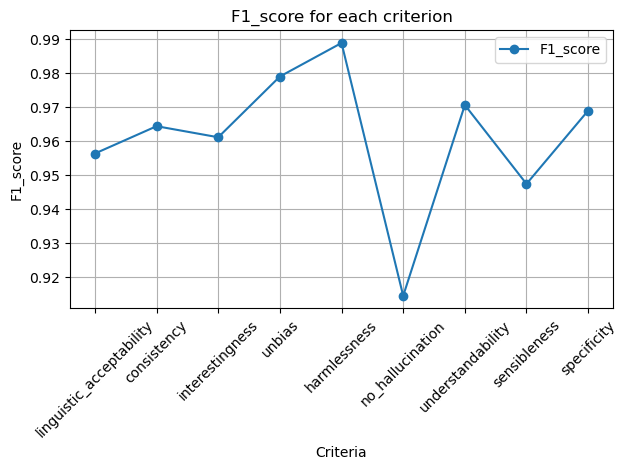

In [7]:
#6.인문_사회
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 데이터 로드 함수 (개별 항목 포함)
def load_data_with_criteria(data_folder):
    texts = []
    all_labels = []
    criteria = None

    for filename in os.listdir(data_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(data_folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for conversation in data['dataset']['conversations']:
                    for utterance in conversation['utterances']:
                        if 'utterance_text' in utterance and 'utterance_evaluation' in utterance:
                            evals = utterance['utterance_evaluation']
                            if evals:  # 평가 데이터가 있는 경우에만 처리
                                texts.append(utterance['utterance_text'])
                                if not criteria:
                                    criteria = list(evals[0].keys())
                                label = [
                                    int(sum(1 for evaluator in evals if evaluator[criterion] == 'yes') >= len(evals) / 2)
                                    for criterion in criteria
                                ]
                                all_labels.append(label)

    if not criteria:
        criteria = []  # 기준이 없을 경우 빈 리스트로 초기화
    return texts, np.array(all_labels), criteria

# 데이터 경로
DATA_FOLDER = './unzipped_files/data_folder6'
texts, labels, criteria = load_data_with_criteria(DATA_FOLDER)

# 텍스트 데이터 전처리
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 크기 확인
print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")
if len(padded_sequences) != len(labels):
    raise ValueError(f"Inconsistent data size: {len(padded_sequences)} sequences vs {len(labels)} labels")

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 모델 정의
embedding_dim = 100
input_text = Input(shape=(max_sequence_length,), name="text_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# 첫 번째 LSTM 레이어
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)

# 두 번째 LSTM 레이어
lstm_layer_2 = LSTM(64, return_sequences=False)(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(lstm_layer_2)

# 출력 레이어
output = Dense(len(criteria), activation='sigmoid', name="output")(dropout_layer_2)

# 모델 생성
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# 모델 저장
MODEL_PATH = './lstm_evaluation_model.h5'
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# 모델 로드 및 예측
model = load_model(MODEL_PATH)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 개별 항목별 성능 평가
def evaluate_individual_criteria(y_test, y_pred, criteria):
    results = {}
    for i, criterion in enumerate(criteria):
        accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
        precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
        results[criterion] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    return results

# 성능 평가 실행
individual_results = evaluate_individual_criteria(y_test, y_pred_binary, criteria)

# 막대 그래프 그리기
def plot_metrics_bar(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.bar(criteria, values)
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 라인 그래프 그리기
def plot_metrics_line(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.plot(criteria, values, marker='o', label=metric.capitalize())
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 결과 출력 및 그래프 그리기
for criterion, metrics in individual_results.items():
    print(f"Criterion: {criterion}")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()

plot_metrics_bar(individual_results)
plot_metrics_line(individual_results)


Number of texts: 25953
Number of labels: 25953


C:\Users\SEUNGSU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_7 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,849 (4.10 MB)

 Trainable params: 1,075,849 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.0652 - loss: 0.3770 - val_accuracy: 0.0164 - val_loss: 0.2292
Epoch 2/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.0322 - loss: 0.2308 - val_accuracy: 0.0713 - val_loss: 0.2121
Epoch 3/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.0463 - loss: 0.1942 - val_accuracy: 0.0669 - val_loss: 0.2136
Epoch 4/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.0529 - loss: 0.1754 - val_accuracy: 0.0657 - val_loss: 0.2220
Epoch 5/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.0535 - loss: 0.1607 - val_accuracy: 0.0510 - val_loss: 0.2263
Epoch 6/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.0511 - loss: 0.1456 - val_accuracy: 0.0614 - val_loss: 0.2443
Epoch 7/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.0548 - loss: 0.1366 - val_accuracy: 0.0433 - val_loss: 0.2498
Epoch 8/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.0536 - loss: 0.1229 - 

Model saved to ./lstm_evaluation_model.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Criterion: linguistic_acceptability
  Accuracy: 0.9110
  Precision: 0.9328
  Recall: 0.9642
  F1_score: 0.9483

Criterion: consistency
  Accuracy: 0.8842
  Precision: 0.9300
  Recall: 0.9345
  F1_score: 0.9323

Criterion: interestingness
  Accuracy: 0.9093
  Precision: 0.9444
  Recall: 0.9544
  F1_score: 0.9494

Criterion: unbias
  Accuracy: 0.9532
  Precision: 0.9718
  Recall: 0.9754
  F1_score: 0.9736

Criterion: harmlessness
  Accuracy: 0.9543
  Precision: 0.9755
  Recall: 0.9708
  F1_score: 0.9731

Criterion: no_hallucination
  Accuracy: 0.8299
  Precision: 0.8904
  Recall: 0.8954
  F1_score: 0.8929

Criterion: understandability
  Accuracy: 0.9505
  Precision: 0.9659
  Recall: 0.9834
  F1_score: 0.9746

Criterion: sensibleness
  Accuracy: 0.8734
  Precision: 0.9138
  Recall: 0.9418
  F1_score: 0.9276

Criterion: specificity
  Accuracy: 0.9297
  Precision: 0.9587
  Recall: 0.9642
  F1_score: 0.9614



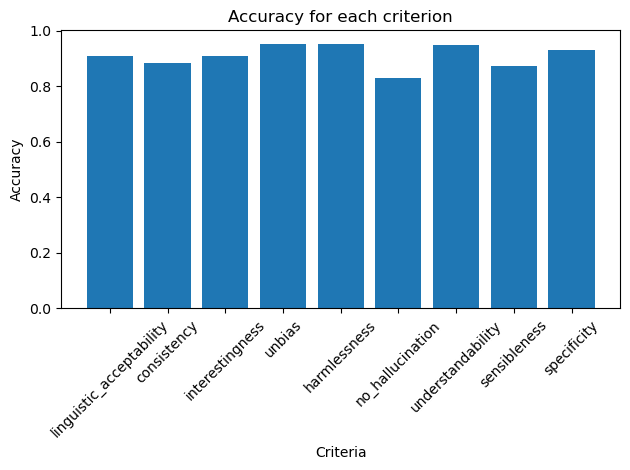

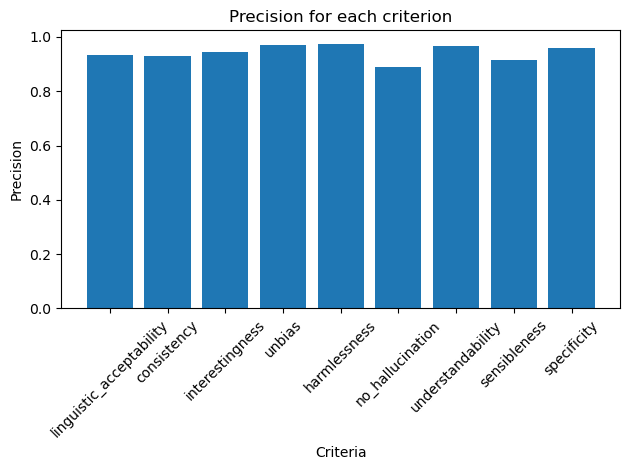

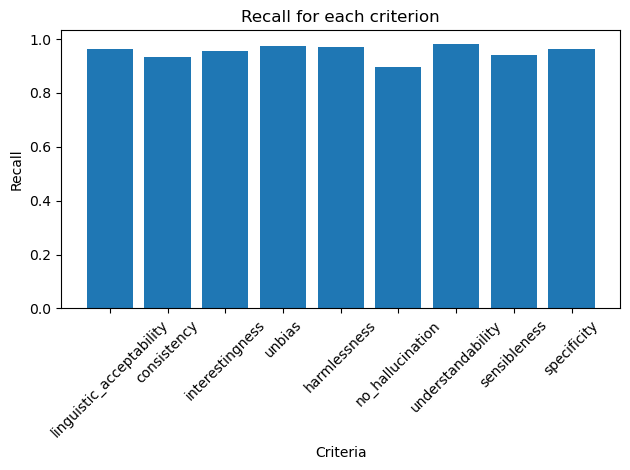

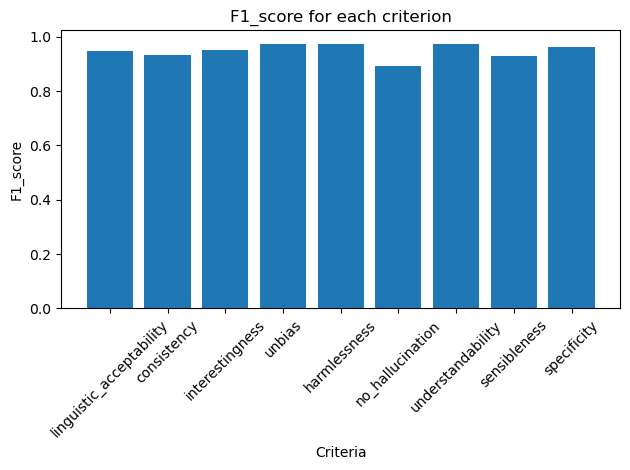

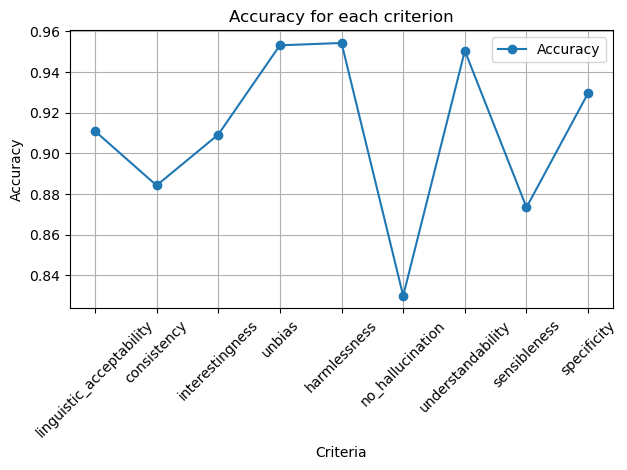

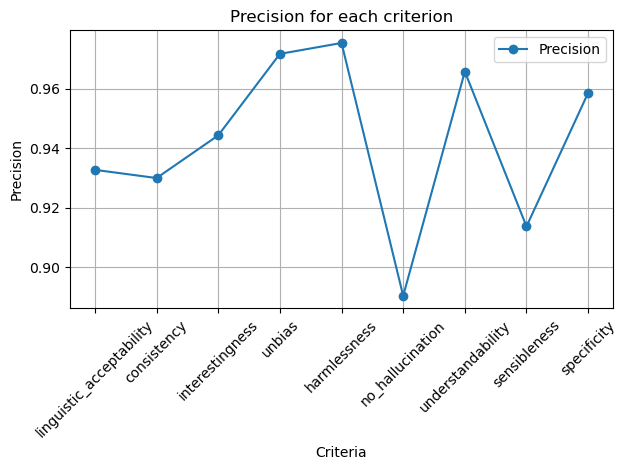

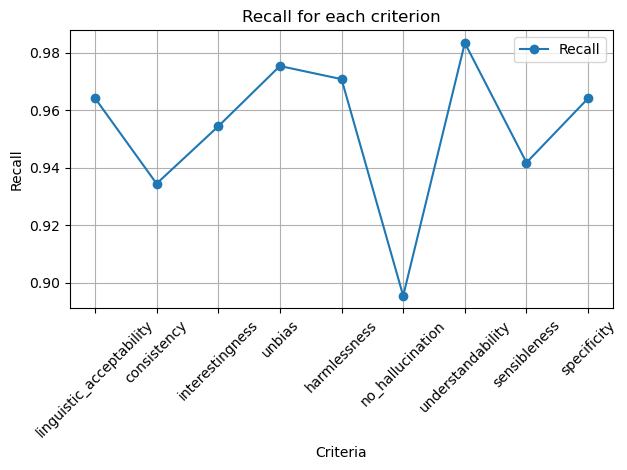

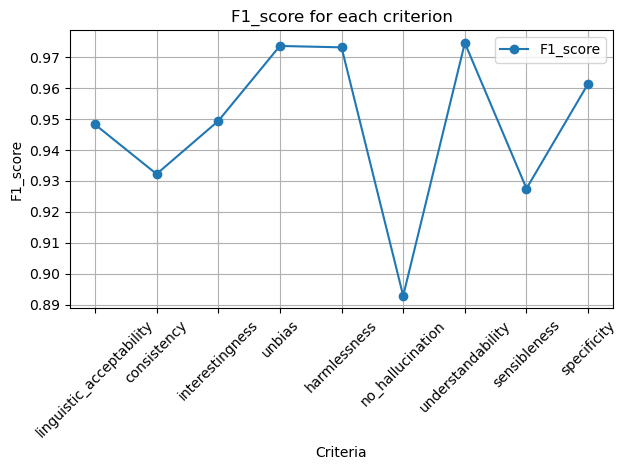

In [8]:
#7.주거_생활_사람관계


import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 데이터 로드 함수 (개별 항목 포함)
def load_data_with_criteria(data_folder):
    texts = []
    all_labels = []
    criteria = None

    for filename in os.listdir(data_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(data_folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for conversation in data['dataset']['conversations']:
                    for utterance in conversation['utterances']:
                        if 'utterance_text' in utterance and 'utterance_evaluation' in utterance:
                            evals = utterance['utterance_evaluation']
                            if evals:  # 평가 데이터가 있는 경우에만 처리
                                texts.append(utterance['utterance_text'])
                                if not criteria:
                                    criteria = list(evals[0].keys())
                                label = [
                                    int(sum(1 for evaluator in evals if evaluator[criterion] == 'yes') >= len(evals) / 2)
                                    for criterion in criteria
                                ]
                                all_labels.append(label)

    if not criteria:
        criteria = []  # 기준이 없을 경우 빈 리스트로 초기화
    return texts, np.array(all_labels), criteria

# 데이터 경로
DATA_FOLDER = './unzipped_files/data_folder7'
texts, labels, criteria = load_data_with_criteria(DATA_FOLDER)

# 텍스트 데이터 전처리
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 크기 확인
print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")
if len(padded_sequences) != len(labels):
    raise ValueError(f"Inconsistent data size: {len(padded_sequences)} sequences vs {len(labels)} labels")

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 모델 정의
embedding_dim = 100
input_text = Input(shape=(max_sequence_length,), name="text_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# 첫 번째 LSTM 레이어
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)

# 두 번째 LSTM 레이어
lstm_layer_2 = LSTM(64, return_sequences=False)(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(lstm_layer_2)

# 출력 레이어
output = Dense(len(criteria), activation='sigmoid', name="output")(dropout_layer_2)

# 모델 생성
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# 모델 저장
MODEL_PATH = './lstm_evaluation_model.h5'
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# 모델 로드 및 예측
model = load_model(MODEL_PATH)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 개별 항목별 성능 평가
def evaluate_individual_criteria(y_test, y_pred, criteria):
    results = {}
    for i, criterion in enumerate(criteria):
        accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
        precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
        results[criterion] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    return results

# 성능 평가 실행
individual_results = evaluate_individual_criteria(y_test, y_pred_binary, criteria)

# 막대 그래프 그리기
def plot_metrics_bar(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.bar(criteria, values)
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 라인 그래프 그리기
def plot_metrics_line(individual_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for metric in metrics:
        values = [individual_results[criterion][metric] for criterion in criteria]
        plt.figure()
        plt.plot(criteria, values, marker='o', label=metric.capitalize())
        plt.title(f"{metric.capitalize()} for each criterion")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Criteria")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 결과 출력 및 그래프 그리기
for criterion, metrics in individual_results.items():
    print(f"Criterion: {criterion}")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()

plot_metrics_bar(individual_results)
plot_metrics_line(individual_results)
